# California Dreamin' or Nightmarin'? Revealing the Hidden Factors Behind 1990's Housing Market

Capstone Project #3 | Inggar Gumintang | JCDSOL - 014 - 2
- Video: Capstone 3-Video

## Business Problem Understanding

#### Context

In 1990, studying housing prices in California became a prominent topic due to the U.S. economic recession during that period. The recession impacted consumption and personal income, leading to significant effects on the real estate market. The purpose of this study is to identify the factors influencing housing prices in California's blocks in 1990, focusing on the properties of the houses, the income levels of buyers, and the geographical surroundings [[1]](https://eudl.eu/pdf/10.4108/eai.18-11-2022.2327138).

The research employs the housing price impact theory and multiple linear regression to analyze these influencing factors. During this time, while national home prices rose by 0.8%, the growth in California was notably slower, marking the slowest national growth since 1990. This study provides insights into the unique economic and geographic factors that shaped the housing market in California during this recessionary period [[2]](https://www.ppic.org/wp-content/uploads/content/pubs/jtf/JTF_HousingMarketJTF.pdf).

#### Problem Statement

The 1990 U.S. economic recession led to a slowdown in California's housing market, with growth in housing prices lagging behind the national average. This study aims to identify the factors influencing housing prices in California during this period, focusing on property attributes, buyer income levels, and geographic surroundings. Using multiple linear regression analysis, we seek to understand the key determinants driving housing price variations in 1990.

#### Goal

The goal of this study is to develop a predictive model that accurately estimates housing prices in California during 1990, based on property characteristics, buyer income levels, and geographic factors. This model will help identify and quantify the specific factors that significantly influenced housing prices during this period, providing insights into the dynamics of the housing market amidst economic recession.

#### Analytic Approach

The approach involves analyzing the dataset to identify patterns and relationships between various features, such as property characteristics, median income, and geographic factors, which influence housing prices. The next step is to build a regression model that will serve as a predictive tool for estimating housing prices. This model aims to assist users in understanding the factors affecting property values and making informed decisions about pricing.

#### Metric Evaluation

The evaluation metrics to be used include RMSE, MAE, and MAPE, where RMSE (Root Mean Squared Error) measures the square root of the average squared errors, MAE (Mean Absolute Error) calculates the average of absolute differences between predicted and actual values, and MAPE (Mean Absolute Percentage Error) provides the average percentage error. Lower values of RMSE, MAE, and MAPE indicate a more accurate model.

Additionally, if the chosen final model is a linear regression model, we will also consider the R-squared or adjusted R-squared values. These metrics indicate how well the model explains the variance in the data, with values closer to 1 indicating a better fit. However, it is important to note that R-squared is not applicable to non-linear models.

## Data Understanding

#### Read Dataset

In [146]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from matplotlib.colors import ListedColormap
from geopy.geocoders import Nominatim

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')

In [147]:
# Read dataset
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


#### Variable Description
- `longitude:` The longitude coordinate of the property, representing its position along the east-west axis on the Earth's surface. This helps to identify the property's location relative to geographic landmarks.
- `latitude:` The latitude coordinate of the property, indicating its position along the north-south axis. This variable is used to determine the property's geographic location.
- `Housing median age:` The median age of houses in the neighborhood. This reflects the typical age of housing structures in the area and can indicate the overall development and renovation status of properties.
- `total_rooms:` The total number of rooms in the property, including all rooms used for living, dining, and sleeping. This feature provides an indication of the property's size and layout.
- `total_bedrooms:` The total number of bedrooms in the property. This variable helps to assess the property's capacity and suitability for different household sizes.
- `population:` The total population residing in the neighborhood. This feature provides context on the density and demographic characteristics of the area surrounding the property.
- `households:` The total number of households in the neighborhood. This variable helps to understand the housing density and the number of living units relative to the population.
- `median_income:` The median income of households in the neighborhood. This economic indicator reflects the income distribution and purchasing power of residents in the area.
- `median house value:` The median value of houses in the neighborhood. This is the target variable representing the housing prices that the model will predict.
- `ocean_proximity:` The proximity of the property to the ocean, categorized into different levels (e.g., "Near Ocean," "Inland"). This feature captures the impact of geographic location on housing prices, with properties closer to the ocean often commanding higher prices.

## Data Cleaning

### Check Data Types

In [148]:
listItem = []
for col in df.columns:
    null_count = df[col].isna().sum()
    filled_count = len(df[col]) - null_count  # Calculate the number of non-null entries
    listItem.append([
        col,
        df[col].dtype,
        null_count,
        round((null_count / len(df[col])) * 100, 2),
        df[col].nunique(),
        list(df[col].drop_duplicates().sample(5).values),
        filled_count  # Add filled_count to the list
    ])

dfDesc = pd.DataFrame(
    columns=['data_features', 'data_type', 'null', 'null_percentage', 'unique', 'unique_sample', 'filled_count'],
    data=listItem
)

dfDesc

,data_features,data_type,null,null_percentage,unique,unique_sample,filled_count
0,longitude,float64,0,0.00,806,"[-119.91, -120.55, -115.46, -117.63, -121.77]",14448
1,latitude,float64,0,0.00,836,"[34.99, 32.68, 36.47, 36.9, 33.79]",14448
2,housing_median_age,float64,0,0.00,52,"[48.0, 10.0, 36.0, 15.0, 51.0]",14448
3,total_rooms,float64,0,0.00,5227,"[1710.0, 1836.0, 1171.0, 18.0, 6260.0]",14448
4,total_bedrooms,float64,137,0.95,1748,"[400.0, 596.0, 1372.0, 6.0, 2495.0]",14311
5,population,float64,0,0.00,3498,"[475.0, 10450.0, 2279.0, 2830.0, 2071.0]",14448
6,households,float64,0,0.00,1649,"[1649.0, 2612.0, 363.0, 1444.0, 411.0]",14448
7,median_income,float64,0,0.00,9797,"[3.2708, 5.5756, 4.8286, 7.0674, 5.118]",14448
8,ocean_proximity,object,0,0.00,5,"[<1H OCEAN, NEAR BAY, NEAR OCEAN, ISLAND, INLAND]",14448
9,median_house_value,float64,0,0.00,3548,"[281600.0, 95200.0, 126200.0, 65800.0, 93100.0]",14448


The ocean_proximity feature should be encoded. Given its categorical nature and the presence of a manageable number of unique values, one-hot encoding would be a suitable approach for preparing this feature for inclusion in predictive models.

### Check Duplicate

In [149]:
duplicates = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity, median_house_value]
Index: []


There is no duplicate data in the df or each row is unique

### Handling Missing Value

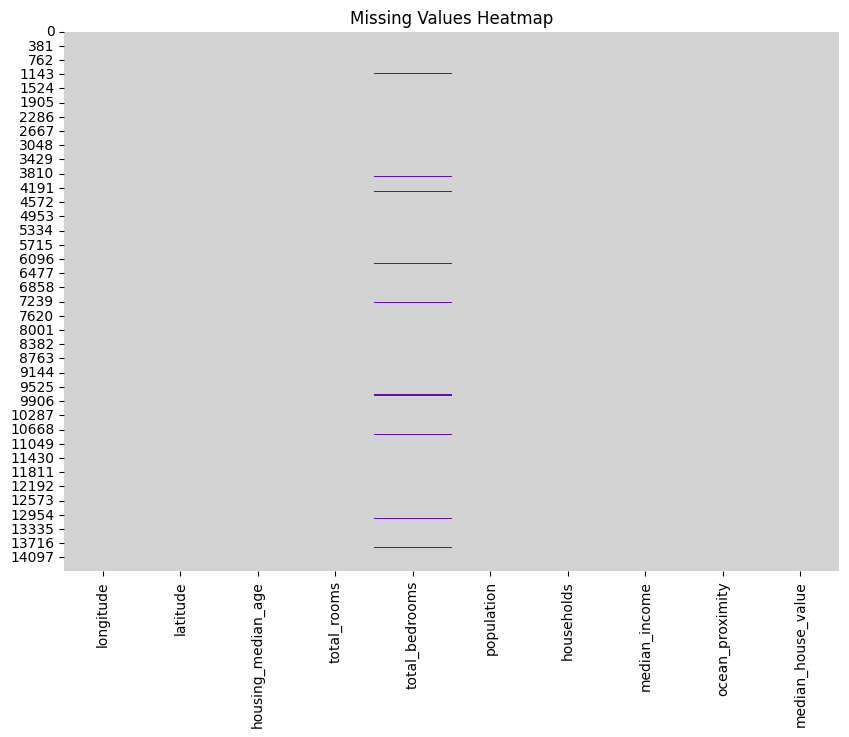

In [150]:
# Create a custom color map
cmap = sns.color_palette(["#d3d3d3", "#6a0dad"])

# Create a heatmap for missing values
plt.figure(figsize=(10, 7))
sns.heatmap(df.isnull(), cbar=False, cmap=cmap)
plt.title('Missing Values Heatmap')
plt.show()

As mentioned previously, there are 137 missing values in the total_bedrooms column, which represents 0.95% of the total entries in this column. Missing values are marked in purple, while non-missing values are indicated in grey. Given the situation, both median imputation and KNN (K-Nearest Neighbors) can be used for handling missing values. Dropping rows is to be avoided due to the limited number of features and the presence of missing data, which might negatively impact the model.

Considering the relationships among features, KNN is preferred due to its ability to utilize feature similarities for imputation.

In [151]:
# Running KNN Imputer

# Separate Categorical and Numerical Columns
# Purpose: Seperates the categorical column from df
categorical_column = df[['ocean_proximity']]
numerical_columns = df.drop(columns=['ocean_proximity'])

# Apply KNN Imputer to Numerical Columns
# Purpose: Uses KNN imputation to fill in missing values
knn_imputer = KNNImputer(n_neighbors=5)
numerical_columns_imputed = knn_imputer.fit_transform(numerical_columns)

# Convert Imputed Data Back to df
numerical_columns_imputed_df = pd.DataFrame(numerical_columns_imputed, columns=numerical_columns.columns)

# Combine Imputed Numerical Columns with Categorical Column
df = pd.concat([numerical_columns_imputed_df, categorical_column.reset_index(drop=True)], axis=1)

# Check missing value
missing_values_count_final = df['total_bedrooms'].isnull().sum()
missing_values_count_final

0

In [152]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   median_house_value  14448 non-null  float64
 9   ocean_proximity     14448 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

total_bedrooms has no missing values ​​after filling with KNN Imputer

#### Handling Outliers

 Method: Interquartile Range (IQR)

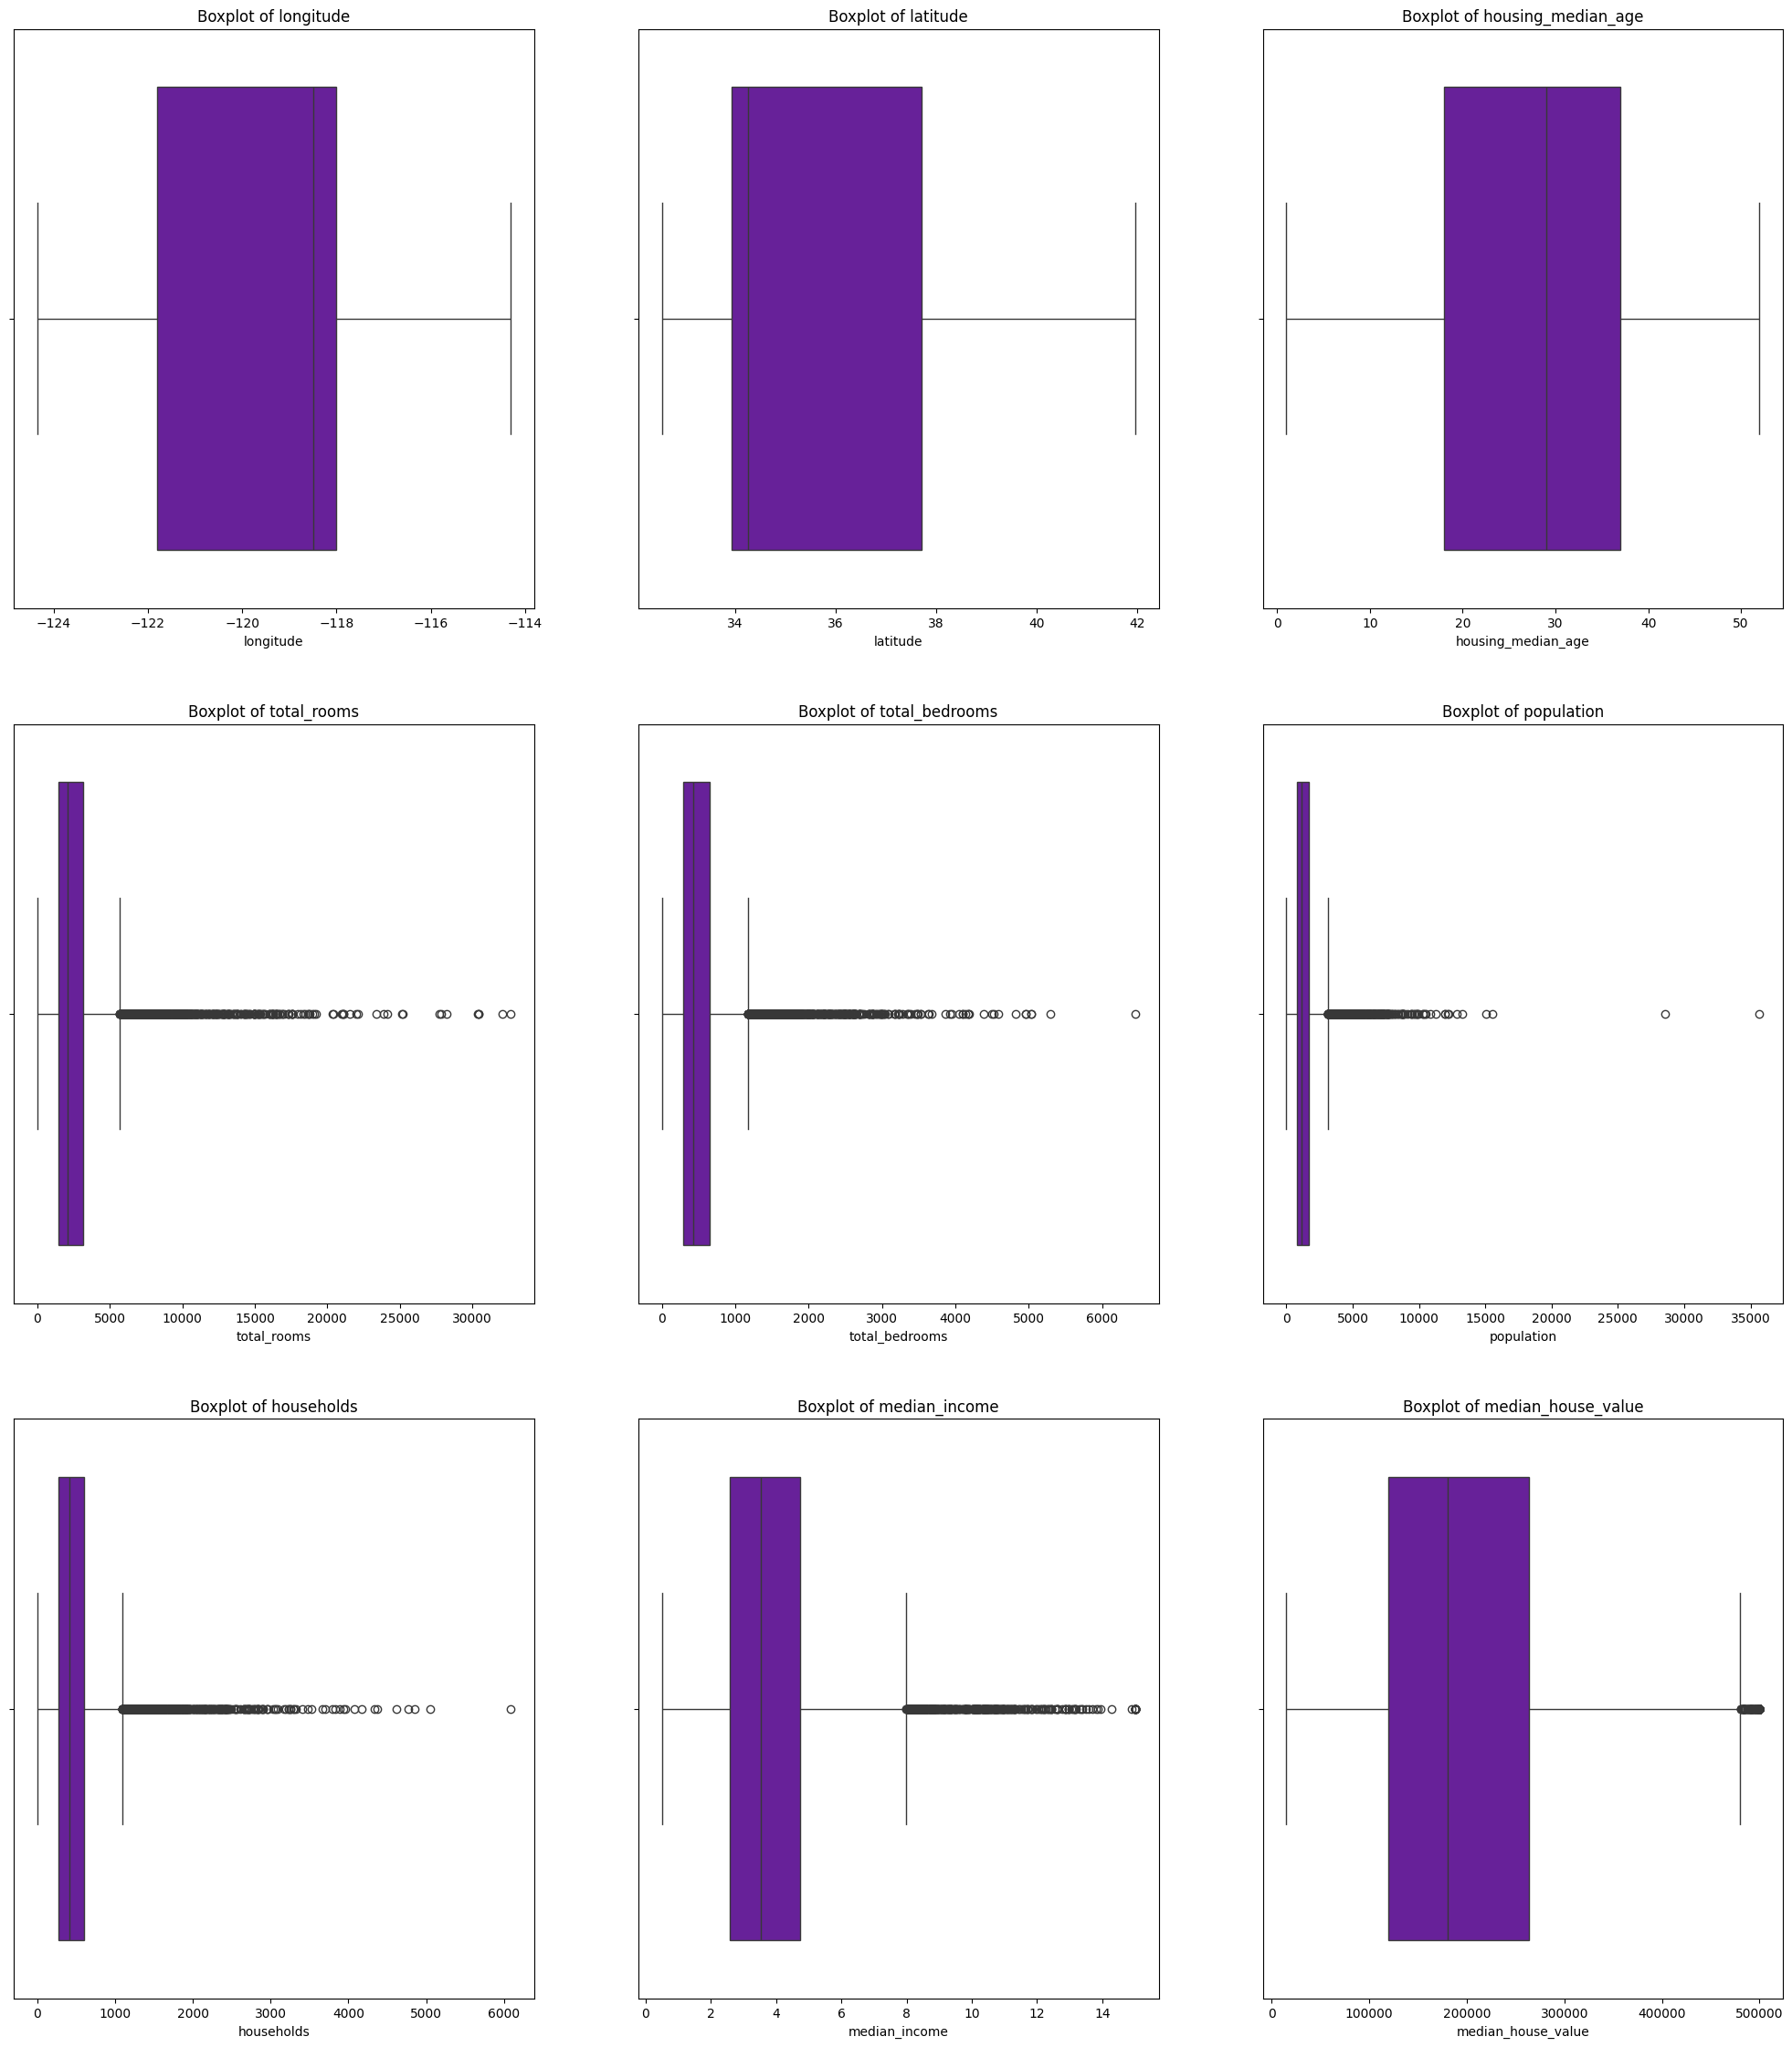

In [153]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,28))
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes.flatten()[i], color='#6a0dad')
    axes.flatten()[i].set_title(f'Boxplot of {col}')
plt.show()

Some columns have outliers that can be handled to avoid distortion. It's better to discard outliers.

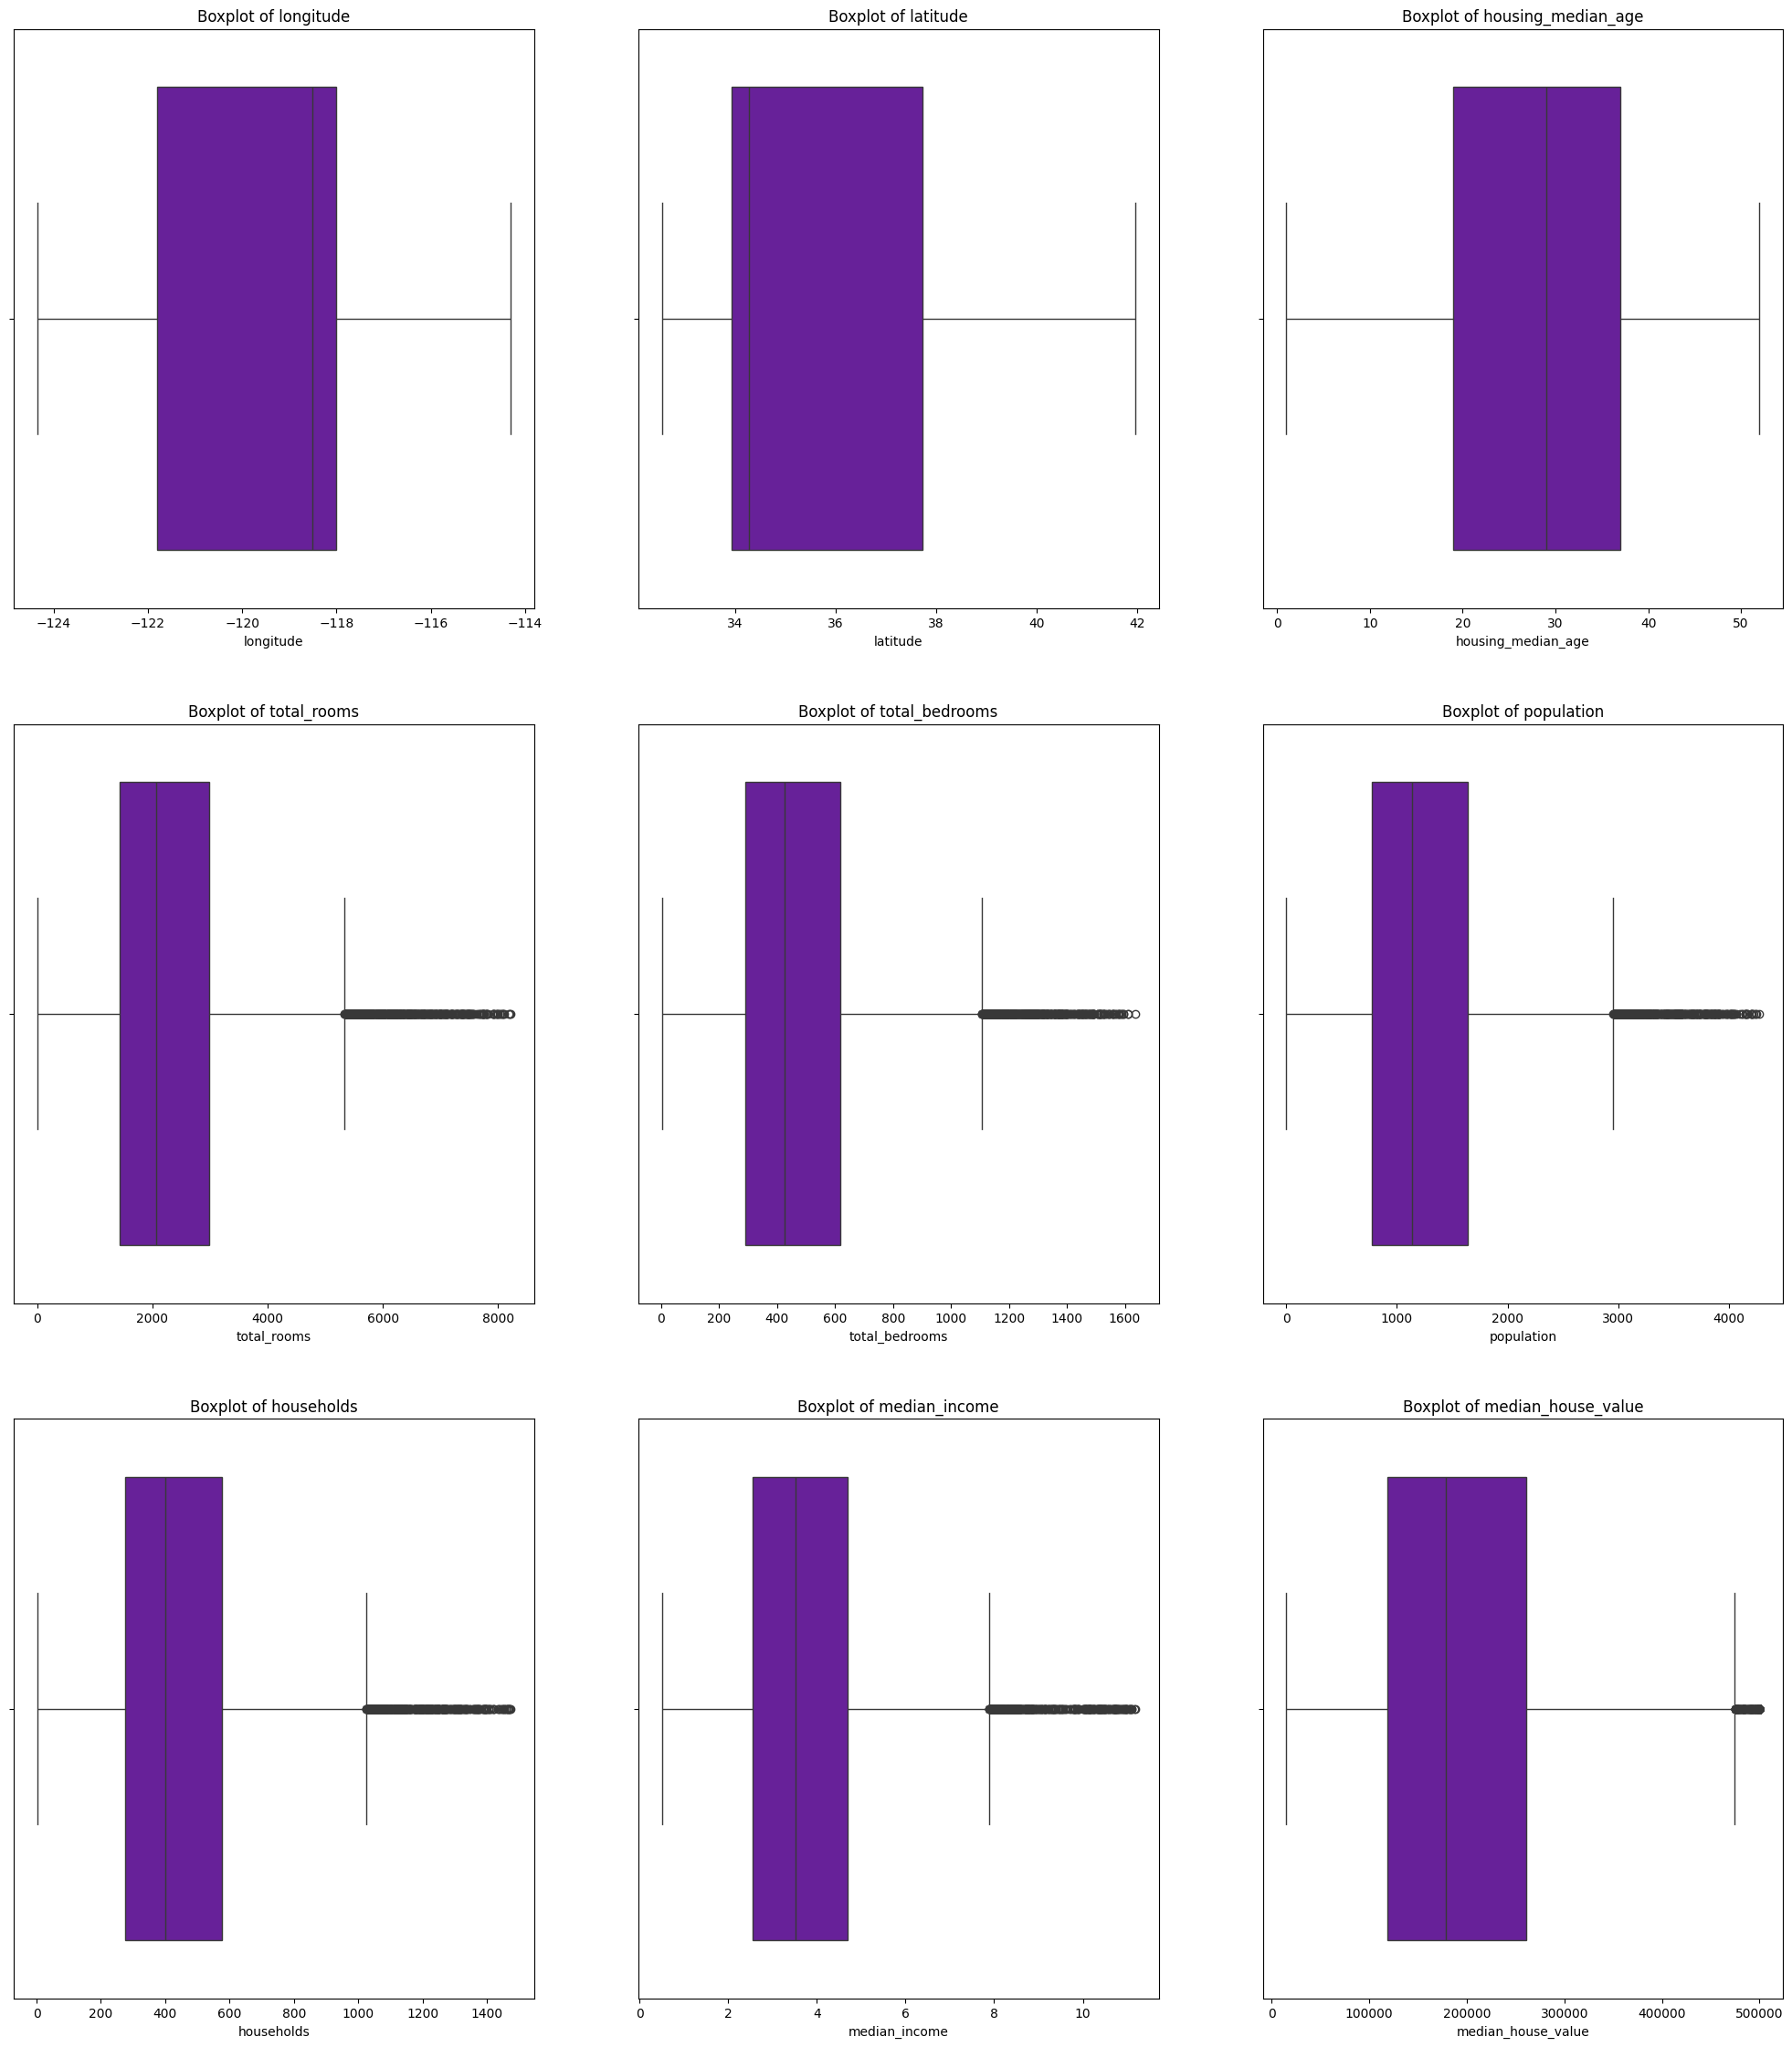

<class 'pandas.core.frame.DataFrame'>
Index: 13789 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13789 non-null  float64
 1   latitude            13789 non-null  float64
 2   housing_median_age  13789 non-null  float64
 3   total_rooms         13789 non-null  float64
 4   total_bedrooms      13789 non-null  float64
 5   population          13789 non-null  float64
 6   households          13789 non-null  float64
 7   median_income       13789 non-null  float64
 8   median_house_value  13789 non-null  float64
 9   ocean_proximity     13789 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,13789.000000,13789.000000,13789.000000,13789.000000,13789.000000,13789.000000,13789.000000,13789.000000,13789.000000
mean,-119.587101,35.651812,29.113134,2340.118500,480.870215,1278.654507,448.794619,3.779673,204020.157444
std,2.006080,2.148005,12.406148,1346.047265,270.950532,724.970702,249.687240,1.712633,113367.310322
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.810000,33.930000,19.000000,1427.000000,291.000000,774.000000,275.000000,2.550600,118100.000000
50%,-118.510000,34.270000,29.000000,2065.000000,426.000000,1139.000000,401.000000,3.510900,178100.000000
75%,-118.010000,37.720000,37.000000,2988.000000,617.000000,1645.000000,575.000000,4.683800,260700.000000
max,-114.310000,41.950000,52.000000,8213.000000,1635.000000,4276.000000,1473.000000,11.176800,500001.000000


In [154]:
# Define a function to remove outliers based on IQR
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# List of columns to check for outliers
numerical_columns = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households',
    'median_income', 'median_house_value'
]

# Remove outliers
df_clean = remove_outliers(df, numerical_columns)

# Plot boxplots to verify outliers removal
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,28))
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df_clean[col], ax=axes.flatten()[i], color='#6a0dad')
    axes.flatten()[i].set_title(f'Boxplot of {col}')
plt.show()

# Check the cleaned data
df_clean.info()
df_clean.describe()

In [155]:
# Calculate the initial and current size
original_length = len(df)
current_length = len(df_clean)

# Calculate the number and percentage of removed entries
num_missing_entries = original_length - current_length
percent_missing = (num_missing_entries / original_length) * 100

print(f"Number of entries removed: {num_missing_entries}")
print(f"Percentage of entries removed: {percent_missing:.2f}%")

Number of entries removed: 659
Percentage of entries removed: 4.56%


It doesn't matter if we remove outliers because the percentage is below 5%

### Exploratory Data Analysis

#### Price Category

In [156]:
# Calculate quartiles
Q1 = df_clean['median_house_value'].quantile(0.25)
Q2 = df_clean['median_house_value'].quantile(0.50)
Q3 = df_clean['median_house_value'].quantile(0.75)

In [157]:
# Define categories based on quartiles
def categorize_price(value):
    if value <= Q1:
        return 'Cheap'
    elif value <= Q2:
        return 'Moderate'
    elif value <= Q3:
        return 'Expensive'
    else:
        return 'Very Expensive'

df_clean['price_category'] = df_clean['median_house_value'].apply(categorize_price)


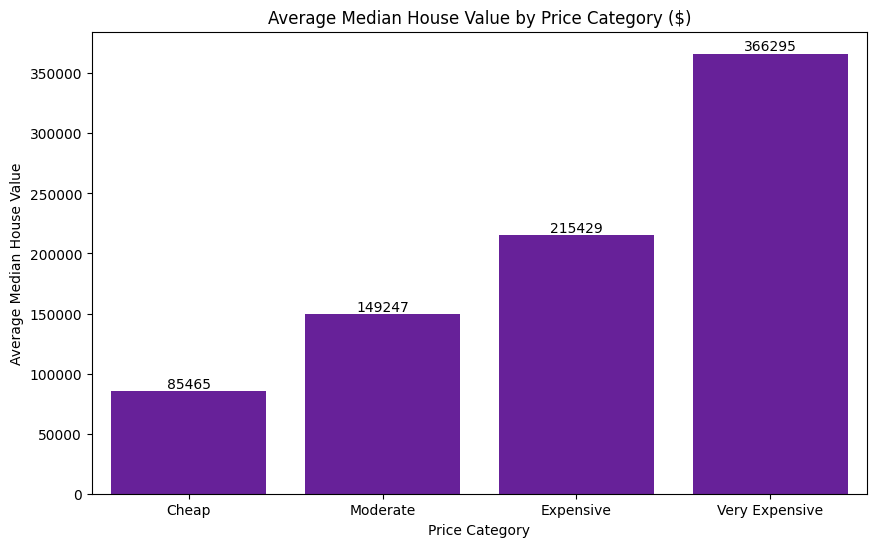

In [158]:
# Calculate average median house value for each price category
avg_values = df_clean.groupby('price_category')['median_house_value'].mean().sort_values()

# Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_values.index, y=avg_values.values, palette=['#6a0dad'])

# Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Average Median House Value by Price Category ($)')
plt.xlabel('Price Category')
plt.ylabel('Average Median House Value')
plt.show()

In [159]:
# Calculate the total number of houses for each price category
category_totals = df_clean['price_category'].value_counts()

# Display the results
print("Total houses per price category:")
print(category_totals)


Total houses per price category:
price_category
Cheap             3452
Moderate          3449
Very Expensive    3444
Expensive         3444
Name: count, dtype: int64


### Correlation

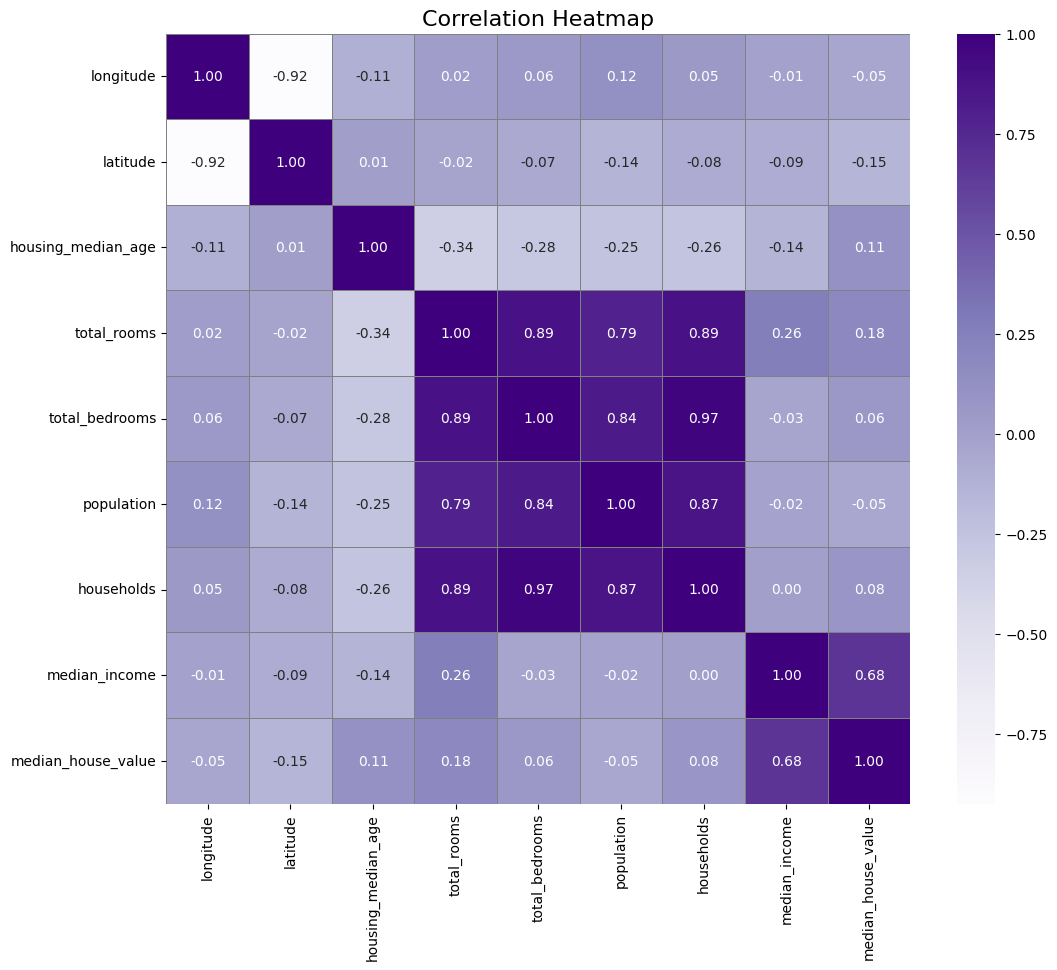

In [160]:

# Select only numeric columns for correlation
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5, linecolor='grey')

# Set the title
plt.title('Correlation Heatmap', fontsize=16)

# Display the plot
plt.show()

Analysis Insights
- Income and House Value: The correlation of 0.68 between median income and median house value suggests a strong relationship. Generally, customers seek homes within their budget, and higher income typically enables higher spending on more expensive properties.
- Household Size and Property Features: High correlations between households, population, total bedrooms, and total rooms indicate that larger households and populations are associated with more spacious homes. This trend suggests that customers with larger families or more significant household sizes might prefer properties with more rooms and amenities.

### Business Opportunity Based on Ocean Proximity

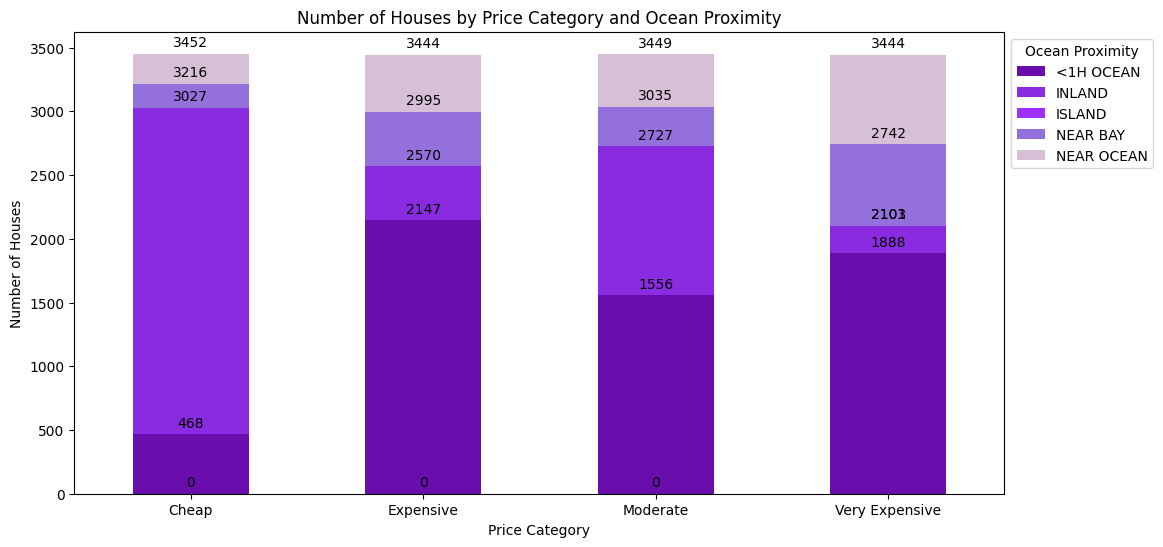

In [161]:
# Create a pivot table to get counts for each combination of price category and ocean proximity
pivot_table = df_clean.pivot_table(index='price_category', columns='ocean_proximity', aggfunc='size', fill_value=0)

# Define a purple color palette
purple_palette = sns.color_palette(['#6a0dad', '#8a2be2', '#9b30ff', '#9370db', '#d8bfd8'])

# Plotting
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=purple_palette)
plt.title('Number of Houses by Price Category and Ocean Proximity')
plt.xlabel('Price Category')
plt.ylabel('Number of Houses')
plt.xticks(rotation=0)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Move the legend to the top right
plt.legend(title='Ocean Proximity', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Summary:
- Near Ocean: Typically includes categories such as NEAR BAY, NEAR OCEAN, and <1H OCEAN, which indicate a closer proximity to the sea or water sources.
- Far from Ocean: Typically includes categories such as ISLAND and INLAND, which indicate a greater distance from the sea or water sources.

When considering the needs for family housing and the economic recession during that period, it turns out there were many affordable houses available, as indicated by the 'Cheap' or affordable category on the graph. While these houses are not near the ocean, which could be an additional value, this doesn't mean we should only focus on analyzing cheap houses.

During the recession, some investors were willing to enter the market for long-term investments, such as developing properties into vacation villas. It is evident that in the 'Very Expensive' category, most properties are near the ocean. This proximity to the ocean becomes a highly promising value, especially if investments were made in 1990. The trend of vacationing has seen significant growth in the 2020s, reinforcing the long-term value of such investments.

### Cost Opportunity Based on House Age

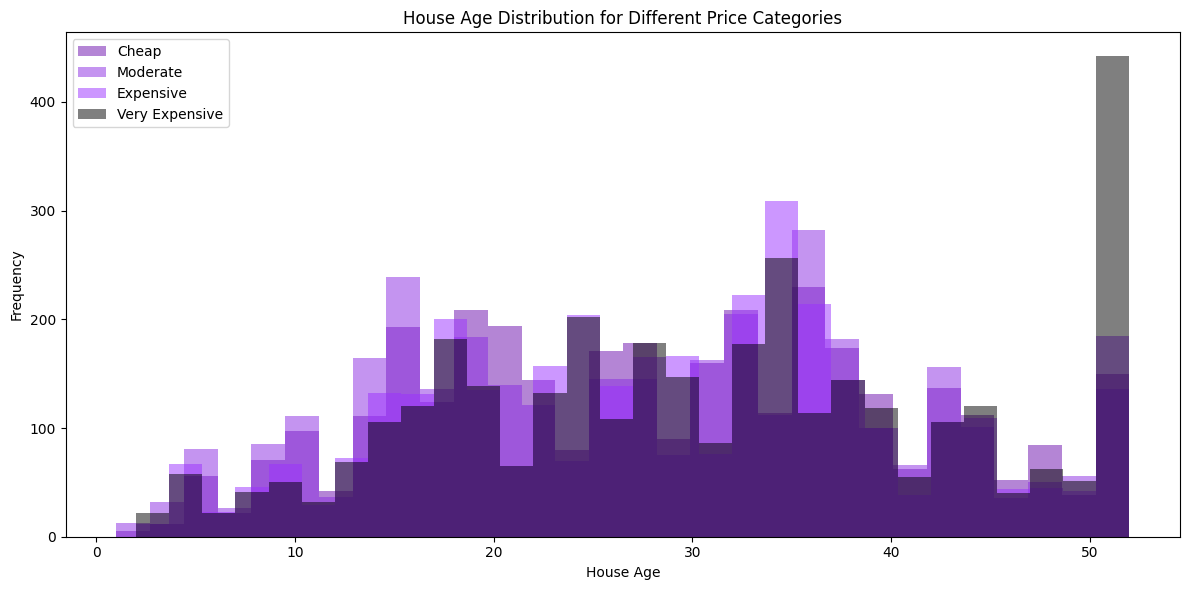

In [162]:
# Calculate the distribution of house age for each price category
house_age_distribution_cheap = df_clean[df_clean['price_category'] == 'Cheap']['housing_median_age']
house_age_distribution_moderate = df_clean[df_clean['price_category'] == 'Moderate']['housing_median_age']
house_age_distribution_expensive = df_clean[df_clean['price_category'] == 'Expensive']['housing_median_age']
house_age_distribution_very_expensive = df_clean[df_clean['price_category'] == 'Very Expensive']['housing_median_age']

# Plotting the distribution
plt.figure(figsize=(12, 6))

plt.hist(house_age_distribution_cheap, bins=30, alpha=0.5, label='Cheap', color='#6a0dad')  # Dark purple
plt.hist(house_age_distribution_moderate, bins=30, alpha=0.5, label='Moderate', color='#8a2be2')  # Medium purple
plt.hist(house_age_distribution_expensive, bins=30, alpha=0.5, label='Expensive', color='#9b30ff')  # Bright purple
plt.hist(house_age_distribution_very_expensive, bins=30, alpha=0.5, label='Very Expensive', color='#000000')  # Black

plt.title('House Age Distribution for Different Price Categories')
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

Despite the colors being highly overlapped, it is evident that 'Very Expensive' houses show a significant spike in frequency for homes older than 50 years. This observation is not a problem if we are considering long-term investment, as it relates closely to revenue substitution for business development.

On the other hand, for 'Cheap' houses, there are no major concerns. These houses tend to have a more varied range of ages and conditions. They can be older but well-maintained, or newer but less well-kept.

### Business Opportunity Based on Room Types

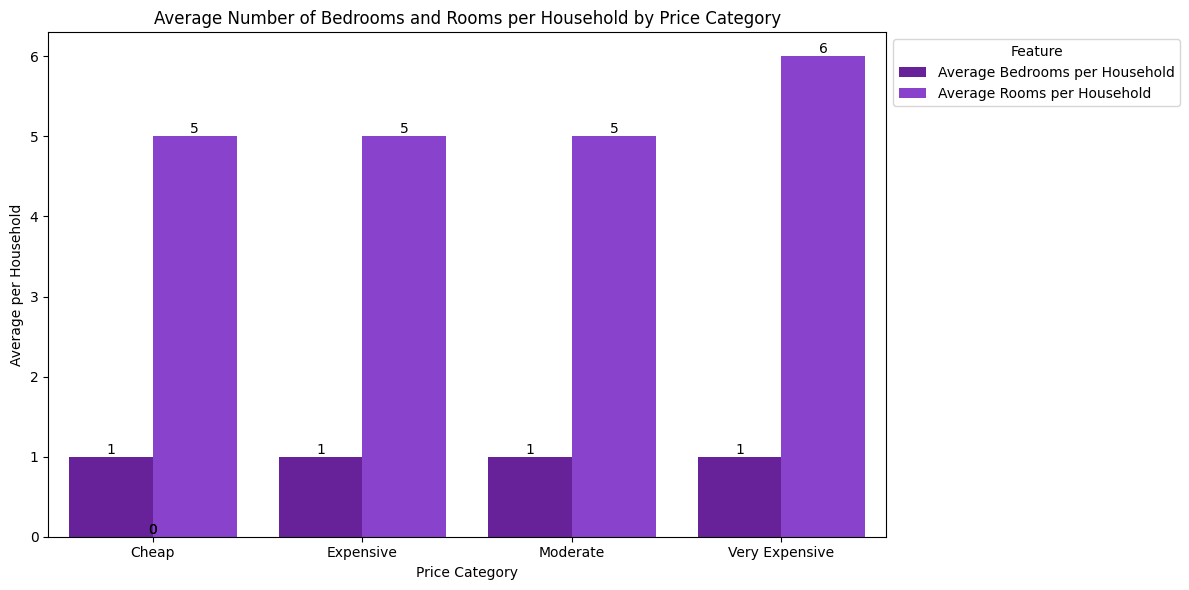

In [163]:
# Calculate average total_bedrooms and total_rooms per household
df_clean['avg_bedrooms_per_household'] = df_clean['total_bedrooms'] / df_clean['households']
df_clean['avg_rooms_per_household'] = df_clean['total_rooms'] / df_clean['households']

# Aggregate average total_bedrooms_per_household and total_rooms_per_household by price_category
aggregated_data = df_clean.groupby('price_category').agg({
    'avg_bedrooms_per_household': 'mean',
    'avg_rooms_per_household': 'mean'
}).reset_index()

# Melt the data for easier plotting with seaborn
melted_data = aggregated_data.melt(id_vars='price_category', var_name='Feature', value_name='Average')

# Round the average values
melted_data['Average'] = melted_data['Average'].apply(lambda x: np.floor(x) if x - np.floor(x) < 0.5 else np.ceil(x))

# Define a purple color palette
purple_palette = sns.color_palette(['#6a0dad', '#8a2be2'])

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='price_category', y='Average', hue='Feature', data=melted_data, palette=purple_palette)

# Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Customize legend
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Average Bedrooms per Household', 'Average Rooms per Household'], title='Feature', bbox_to_anchor=(1, 1), loc='upper left')

plt.title('Average Number of Bedrooms and Rooms per Household by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average per Household')
plt.tight_layout()
plt.show()


From the data, no unique patterns are evident as the average number of bedrooms is consistent across each price category, and the differences in the number of rooms are not significant. This might be due to inaccuracies in data collection or classification, such as distinguishing between specific types of rooms like dining rooms, kitchens, and others. This observation suggests that feature classification may need reevaluation.

Additionally, it would be more insightful to analyze the average house size and outdoor space for each price category. This could provide a clearer understanding of how these factors correlate with the different price categories and enhance the evaluation of property features.

### Data Manipulation

#### Add Column

Since our dataset values are aggregated by block (with multiple houses per block), we need to calculate room count, bedroom count, and population per house.

In [164]:
df_clean['rooms_per_household'] = (df_clean['total_rooms'] / df_clean['households']).round()
df_clean['bedrooms_per_household'] = (df_clean['total_bedrooms'] / df_clean['households']).round()
df_clean['population_per_household'] = (df_clean['population'] / df_clean['households']).round()

df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category,avg_bedrooms_per_household,avg_rooms_per_household,rooms_per_household,bedrooms_per_household,population_per_household
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0,INLAND,Cheap,0.700000,2.800000,3.0,1.0,5.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0,NEAR BAY,Cheap,1.184116,3.671480,4.0,1.0,3.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0,<1H OCEAN,Very Expensive,1.087912,6.478022,6.0,1.0,4.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0,<1H OCEAN,Moderate,1.196000,2.518000,3.0,1.0,3.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0,INLAND,Cheap,1.161677,4.622754,5.0,1.0,4.0


In [165]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13789 entries, 0 to 14447
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   13789 non-null  float64
 1   latitude                    13789 non-null  float64
 2   housing_median_age          13789 non-null  float64
 3   total_rooms                 13789 non-null  float64
 4   total_bedrooms              13789 non-null  float64
 5   population                  13789 non-null  float64
 6   households                  13789 non-null  float64
 7   median_income               13789 non-null  float64
 8   median_house_value          13789 non-null  float64
 9   ocean_proximity             13789 non-null  object 
 10  price_category              13789 non-null  object 
 11  avg_bedrooms_per_household  13789 non-null  float64
 12  avg_rooms_per_household     13789 non-null  float64
 13  rooms_per_household         13789 no

In [166]:
listItem = []
for col in df_clean.columns:
    null_count = df_clean[col].isna().sum()
    filled_count = len(df_clean[col]) - null_count  # Calculate the number of non-null entries
    
    unique_values = list(df_clean[col].drop_duplicates())
    sample_size = min(len(unique_values), 5)  # Take sample size as minimum of 5 or number of unique values
    sample = list(np.random.choice(unique_values, sample_size, replace=False)) if sample_size > 0 else []
    
    listItem.append([
        col,
        df_clean[col].dtype,
        null_count,
        round((null_count / len(df_clean[col])) * 100, 2),
        df_clean[col].nunique(),
        sample,
        filled_count  # Add filled_count to the list
    ])

df_cleanDesc = pd.DataFrame(
    columns=['data_features', 'data_type', 'null', 'null_percentage', 'unique', 'unique_sample', 'filled_count'],
    data=listItem
)

df_cleanDesc


,data_features,data_type,null,null_percentage,unique,unique_sample,filled_count
0,longitude,float64,0,0.0,798,"[-118.91, -121.88, -118.69, -118.85, -119.16]",13789
1,latitude,float64,0,0.0,831,"[34.29, 40.26, 39.32, 33.16, 34.0]",13789
2,housing_median_age,float64,0,0.0,52,"[34.0, 3.0, 44.0, 1.0, 37.0]",13789
3,total_rooms,float64,0,0.0,4723,"[106.0, 1850.0, 1569.0, 2371.0, 3651.0]",13789
4,total_bedrooms,float64,0,0.0,1465,"[323.0, 737.0, 660.0, 582.6, 709.0]",13789
5,population,float64,0,0.0,3038,"[4251.0, 1739.0, 543.0, 2255.0, 2294.0]",13789
6,households,float64,0,0.0,1279,"[1195.0, 499.0, 199.0, 724.0, 642.0]",13789
7,median_income,float64,0,0.0,9290,"[3.3958, 2.3462, 4.1058, 1.8906, 6.6312]",13789
8,median_house_value,float64,0,0.0,3502,"[49000.0, 89700.0, 293300.0, 147600.0, 312500.0]",13789
9,ocean_proximity,object,0,0.0,5,"[ISLAND, INLAND, NEAR BAY, NEAR OCEAN, <1H OCEAN]",13789


### Data Preprocessing

#### One-Hot Encoding 'Ocean Proximity'

One-hot encoding is used for the variable 'ocean_proximity' to convert categorical values into a numerical format suitable for machine learning algorithms. Since many algorithms require numerical input, one-hot encoding transforms each category into a binary column, indicating the presence or absence of each category. This allows the model to interpret categorical data without implying any ordinal relationship between categories, ensuring accurate analysis and predictions.

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

import statsmodels.api as sm
import category_encoders as ce


The remaining columns (INLAND, NEAR BAY, NEAR OCEAN, ISLAND) will be used to compare each category against <1H OCEAN, the reference category.

In [168]:
# One-Hot Encoding for 'ocean_proximity'
ohe = OneHotEncoder(sparse_output=False, drop='first') 
ohe_features = ohe.fit_transform(df_clean[['ocean_proximity']])
ohe_df = pd.DataFrame(ohe_features, columns=ohe.get_feature_names_out(['ocean_proximity']))


In [169]:
ohe_df.isna().sum()

ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [170]:
# Reset index for all DataFrames to ensure they align properly
df_clean_reset = df_clean.reset_index(drop=True)
ohe_df_reset = ohe_df.reset_index(drop=True)

In [171]:
# Drop the original 'ocean_proximity' columns and create the new DataFrame
df_encoded = df_clean_reset.drop(columns=['ocean_proximity'])
df_encoded = pd.concat([df_encoded, ohe_df_reset], axis=1)

In [172]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13789 entries, 0 to 13788
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   13789 non-null  float64
 1   latitude                    13789 non-null  float64
 2   housing_median_age          13789 non-null  float64
 3   total_rooms                 13789 non-null  float64
 4   total_bedrooms              13789 non-null  float64
 5   population                  13789 non-null  float64
 6   households                  13789 non-null  float64
 7   median_income               13789 non-null  float64
 8   median_house_value          13789 non-null  float64
 9   price_category              13789 non-null  object 
 10  avg_bedrooms_per_household  13789 non-null  float64
 11  avg_rooms_per_household     13789 non-null  float64
 12  rooms_per_household         13789 non-null  float64
 13  bedrooms_per_household      137

In [173]:
df_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,price_category,avg_bedrooms_per_household,avg_rooms_per_household,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0,Cheap,0.700000,2.800000,3.0,1.0,5.0,1.0,0.0,0.0,0.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0,Cheap,1.184116,3.671480,4.0,1.0,3.0,0.0,0.0,1.0,0.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0,Very Expensive,1.087912,6.478022,6.0,1.0,4.0,0.0,0.0,0.0,0.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0,Moderate,1.196000,2.518000,3.0,1.0,3.0,0.0,0.0,0.0,0.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0,Cheap,1.161677,4.622754,5.0,1.0,4.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,144600.0,Moderate,1.045662,6.000000,6.0,1.0,3.0,1.0,0.0,0.0,0.0
13785,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,159400.0,Moderate,0.933014,5.349282,5.0,1.0,3.0,1.0,0.0,0.0,0.0
13786,-121.90,36.58,31.0,1431.0,284.8,704.0,393.0,3.1977,289300.0,Very Expensive,0.724682,3.641221,4.0,1.0,2.0,0.0,0.0,0.0,1.0
13787,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,484600.0,Very Expensive,1.064103,4.540598,5.0,1.0,2.0,0.0,0.0,0.0,0.0


#### Feature Selection

Backward regression, or backward elimination, is a feature selection method used to improve model performance by systematically removing less significant variables.

In [174]:
# Define selected features
selected_features = [
    'longitude', 'latitude', 'housing_median_age', 'rooms_per_household',
    'bedrooms_per_household', 'population_per_household', 'households',
    'median_income'
]
selected_features += list(ohe_df.columns)  # Add OneHotEncoded features

# Prepare data for OLS regression
X_reg = df_encoded[selected_features]
y_reg = df_encoded['median_house_value']

# Add constant term for the intercept
X_reg_with_const = sm.add_constant(X_reg)

# Fit OLS model
model = sm.OLS(y_reg, X_reg_with_const).fit()

# Make predictions
predictions = model.predict(X_reg_with_const)

# Calculate metrics
mse = mean_squared_error(y_reg, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_reg, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Print model summary
print(model.summary())


MSE: 5005383602.325225
RMSE: 70748.73569418202
MAPE: 0.30075205864062693
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1799.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:29:05   Log-Likelihood:            -1.7355e+05
No. Observations:               13789   AIC:                         3.471e+05
Df Residuals:                   13776   BIC:                         3.472e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [175]:
# Check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = X_reg.columns
vif['VIF'] = [variance_inflation_factor(X_reg.values, i) for i in range(X_reg.shape[1])]
vif['Multicollinearity'] = vif['VIF'].apply(lambda x: 'Yes' if x > 10 else 'No')

print(vif)


                       Feature         VIF Multicollinearity
0                    longitude  831.154830               Yes
1                     latitude  798.614459               Yes
2           housing_median_age    8.430218                No
3          rooms_per_household   41.584760               Yes
4       bedrooms_per_household   32.209470               Yes
5     population_per_household    1.333357                No
6                   households    4.811540                No
7                median_income   12.549057               Yes
8       ocean_proximity_INLAND    2.782084                No
9       ocean_proximity_ISLAND    1.000672                No
10    ocean_proximity_NEAR BAY    1.678039                No
11  ocean_proximity_NEAR OCEAN    1.304819                No


Variables with multicollinearity issues are often closely related, causing the model to struggle in isolating the contribution of each feature to the target variable. Here is the analysis and assumptions related to variables showing high multicollinearity in your dataset:

1. Longitude and Latitude
    - Issue:
        - High VIF: 831.15 (longitude) and 798.61 (latitude)
        - Multicollinearity Issue: These variables may show high correlation because geographic location generally exhibits spatial patterns that are interrelated.
    - Assumptions:
        - Geography: Longitude and latitude are closely related because changes in one geographic dimension will affect the other. For example, a specific longitude and latitude location will have similar environmental characteristics.

2. Rooms per Household and Bedrooms per Household
    - Issue:
        - High VIF: 41.58 (rooms_per_household) and 32.21 (bedrooms_per_household)
        - Multicollinearity Issue: These variables are closely related because as the number of rooms in a house increases, there is a higher likelihood of having more bedrooms as well.
    - Assumptions:
        - Causal Relationship: A house with many rooms typically has more bedrooms. They are often directly related because larger homes tend to have more bedrooms.

3. Median Income
    - Issue:
        - High VIF: 12.55
        - Multicollinearity Issue: Median income may be related to other variables such as house size or location, which can contribute to multicollinearity.
    - Assumptions:
        - Economic Influence: Median income is often related to house size, location, and environmental quality. More expensive houses are likely to be in areas with higher median incomes.

Solutions and Approaches
- Removing Variables: Consider removing one of the highly correlated variables, such as removing rooms_per_household or bedrooms_per_household, to reduce multicollinearity.

Next Steps
- Feature Selection: Based on the above analysis, select the most relevant features and reduce features with high multicollinearity.
- Model Evaluation: Test the model with and without these features to observe the impact on model performance.

In [176]:
# Select relevant features
selected_features = ['housing_median_age','bedrooms_per_household','median_income','population_per_household','households']
selected_features += list(ohe_df.columns)  # Add the OneHotEncoded features

In [177]:
selected_features

['housing_median_age',
 'bedrooms_per_household',
 'median_income',
 'population_per_household',
 'households',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [178]:
# Prepare the data for OLS
X_bwd_reg = df_encoded[selected_features]
y_bwd_reg = df_encoded['median_house_value']

In [179]:
X_bwd_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13789 entries, 0 to 13788
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          13789 non-null  float64
 1   bedrooms_per_household      13789 non-null  float64
 2   median_income               13789 non-null  float64
 3   population_per_household    13789 non-null  float64
 4   households                  13789 non-null  float64
 5   ocean_proximity_INLAND      13789 non-null  float64
 6   ocean_proximity_ISLAND      13789 non-null  float64
 7   ocean_proximity_NEAR BAY    13789 non-null  float64
 8   ocean_proximity_NEAR OCEAN  13789 non-null  float64
dtypes: float64(9)
memory usage: 969.7 KB


In [180]:
# Add a constant term for the intercept
X_with_constant = sm.add_constant(X_bwd_reg)

# Fit the OLS model
model_bwd = sm.OLS(y_bwd_reg, X_with_constant).fit()

In [181]:
# Make predictions
predictions = model_bwd.predict(X_with_constant)

# Calculate metrics
mse = mean_squared_error(y_bwd_reg, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_bwd_reg, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Print the summary of the model
print(model_bwd.summary())

MSE: 5160522773.627226
RMSE: 71836.77869745571
MAPE: 0.3002689658515521
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     2282.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:29:05   Log-Likelihood:            -1.7376e+05
No. Observations:               13789   AIC:                         3.475e+05
Df Residuals:                   13779   BIC:                         3.476e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

Overall Test:
Approximately 59.8% of the variation in median house values can be explained by the independent variables in the model, as indicated by the R-squared value. This suggests that the model has a reasonably good predictive power, but there remains 40.2% of the variation in median house values that is unexplained by the model. The F-statistic test shows that at least one independent variable has a significant effect on the dependent variable, with a p-value < 0.05. This means that the model as a whole is significant and contributes meaningfully to explaining the variation in median house values.

Partial Test:
Based on the t-tests for each coefficient of the independent variables, all features have p-values < 0.05, indicating that each variable has a significant impact on median house values. High t-values and small p-values support the conclusion that all independent variables in the model are statistically significant and contribute significantly to the dependent variable.

Insights:
- Median Income and Housing Age: These variables have a strong impact on median house values. This highlights the importance of income and the condition of the house in determining house prices.
- Location: Homes located in inland areas have significantly lower values compared to areas like NEAR OCEAN or ISLAND, indicating the significant value of location.

In [182]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_bwd_reg.columns
vif_data['VIF'] = [variance_inflation_factor(X_bwd_reg.values, i) for i in range(X_bwd_reg.shape[1])]
vif_data['Multicollinearity'] = vif_data['VIF'].apply(lambda x: 'Yes' if x > 10 else 'No')

# Display the VIF results
vif_data

,Feature,VIF,Multicollinearity
0,housing_median_age,4.425413,No
1,bedrooms_per_household,5.067358,No
2,median_income,4.438443,No
3,population_per_household,1.314179,No
4,households,3.268195,No
5,ocean_proximity_INLAND,1.646151,No
6,ocean_proximity_ISLAND,1.000497,No
7,ocean_proximity_NEAR BAY,1.320911,No
8,ocean_proximity_NEAR OCEAN,1.273579,No


The VIF analysis indicates that there are no significant multicollinearity issues among the features, allowing for the continued development of the model.

### Modeling

In [183]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, make_scorer
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (VotingRegressor, StackingRegressor, BaggingRegressor, 
                              RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor)
from xgboost import XGBRegressor

# Ignore warnings
warnings.filterwarnings('ignore')

In [184]:
# X_bwd_reg is the feature matrix used for model training and evaluation.
# It contains the predictor variables selected after backward regression, which will be used to train the models.
# These features are the independent variables used to predict the target variable and assess model performance.

X_bwd_reg

,housing_median_age,bedrooms_per_household,median_income,population_per_household,households,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,52.0,1.0,1.9750,5.0,40.0,1.0,0.0,0.0,0.0
1,43.0,1.0,2.2604,3.0,277.0,0.0,0.0,1.0,0.0
2,17.0,1.0,6.2990,4.0,364.0,0.0,0.0,0.0,0.0
3,17.0,1.0,1.7199,3.0,1000.0,0.0,0.0,0.0,0.0
4,50.0,1.0,2.2206,4.0,167.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13784,20.0,1.0,4.4125,3.0,219.0,1.0,0.0,0.0,0.0
13785,27.0,1.0,2.9135,3.0,209.0,1.0,0.0,0.0,0.0
13786,31.0,1.0,3.1977,2.0,393.0,0.0,0.0,0.0,1.0
13787,34.0,1.0,5.6315,2.0,468.0,0.0,0.0,0.0,0.0


In [185]:
# y_bwd_reg is the target variable (dependent variable) for model training and evaluation.
# It contains the values that the models will predict based on the features in X_bwd_reg.
# This variable represents the outcome or response that the regression models are trying to estimate.

y_bwd_reg

0         47500.0
1        100000.0
2        285800.0
3        175000.0
4         59200.0
           ...   
13784    144600.0
13785    159400.0
13786    289300.0
13787    484600.0
13788     69400.0
Name: median_house_value, Length: 13789, dtype: float64

In [186]:
# Split the data into training and testing sets.
# X_bwd_reg contains the feature matrix, and y_bwd_reg contains the target variable.
# 80% of the data is used for training and 20% for testing. The split is reproducible with random_state=42.

xtrain, xtest, ytrain, ytest = train_test_split(X_bwd_reg, y_bwd_reg, 
                                                random_state=42, 
                                                test_size=0.2)


In [187]:
# Scale the features using RobustScaler to handle outliers.
# Fit the scaler on the training data and transform both training and testing sets.

scaler = RobustScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)


In [188]:
# Convert the scaled training feature matrix to a DataFrame for easier inspection and analysis.
# This DataFrame will have the same number of rows and columns as xtrain_scaled but with scaled feature values.

pd.DataFrame(xtrain_scaled)


,0,1,2,3,4,5,6,7,8
0,-0.111111,0.0,-0.272574,0.0,-0.354515,1.0,0.0,0.0,0.0
1,0.833333,0.0,0.534037,0.0,-0.073579,0.0,0.0,0.0,1.0
2,0.111111,0.0,0.603422,-1.0,0.157191,0.0,0.0,0.0,1.0
3,-0.055556,0.0,0.500047,-1.0,0.371237,0.0,0.0,0.0,0.0
4,-0.166667,0.0,-0.249695,0.0,-0.341137,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
11026,1.277778,0.0,-0.740694,0.0,0.013378,0.0,0.0,0.0,0.0
11027,1.277778,0.0,-1.088561,0.0,-0.809365,0.0,0.0,1.0,0.0
11028,-0.611111,0.0,-0.551992,-1.0,1.454849,1.0,0.0,0.0,0.0
11029,0.833333,0.0,0.897515,-1.0,-0.086957,0.0,0.0,0.0,0.0


In [189]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, make_scorer

# Define base models
models = [
    (KNeighborsRegressor(), 'KNN'),
    (DecisionTreeRegressor(random_state=42), 'Decision Tree'),
    (LinearRegression(), 'Linear Regression'),
    (SVR(), 'Support Vector Regressor'),
    (VotingRegressor([('knn', KNeighborsRegressor()), ('dt', DecisionTreeRegressor(random_state=42)), ('linreg', LinearRegression())]), 'Voting Regressor'),
    (StackingRegressor(estimators=[('knn', KNeighborsRegressor()), ('dt', DecisionTreeRegressor(random_state=42)), ('linreg', LinearRegression())], final_estimator=KNeighborsRegressor()), 'Stacking - KNN'),
    (StackingRegressor(estimators=[('knn', KNeighborsRegressor()), ('dt', DecisionTreeRegressor(random_state=42)), ('linreg', LinearRegression())], final_estimator=DecisionTreeRegressor()), 'Stacking - DT'),
    (StackingRegressor(estimators=[('knn', KNeighborsRegressor()), ('dt', DecisionTreeRegressor(random_state=42)), ('linreg', LinearRegression())], final_estimator=LinearRegression()), 'Stacking - Linear Regression'),
    (BaggingRegressor(estimator=LinearRegression(), n_estimators=10, random_state=42), 'Bagging Regressor'),
    (RandomForestRegressor(n_estimators=250, max_depth=5, random_state=42), 'Random Forest'),
    (AdaBoostRegressor(n_estimators=300, random_state=42), 'AdaBoost'),
    (GradientBoostingRegressor(n_estimators=300, random_state=42), 'Gradient Boosting'),
    (XGBRegressor(n_estimators=300, random_state=42), 'XGBoost')
]

# Define a scoring function for cross-validation
scoring_rmse = make_scorer(mean_squared_error, squared=False)

# Initialize results list
results_train = []

# Perform manual cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model, name in models:
    mse_scores, rmse_scores, mape_scores, r2_scores = [], [], [], []

    for train_index, val_index in kf.split(xtrain_scaled):
        X_cv_train, X_cv_val = xtrain_scaled[train_index], xtrain_scaled[val_index]
        y_cv_train, y_cv_val = ytrain.iloc[train_index], ytrain.iloc[val_index]

        model.fit(X_cv_train, y_cv_train)
        y_cv_pred = model.predict(X_cv_val)

        mse_scores.append(mean_squared_error(y_cv_val, y_cv_pred))
        rmse_scores.append(mean_squared_error(y_cv_val, y_cv_pred, squared=False))
        mape_scores.append(mean_absolute_percentage_error(y_cv_val, y_cv_pred))
        r2_scores.append(r2_score(y_cv_val, y_cv_pred))

    results_train.append({
        'Model': name,
        'Mean MSE': np.mean(mse_scores),
        'Std MSE': np.std(mse_scores),
        'Mean RMSE': np.mean(rmse_scores),
        'Std RMSE': np.std(rmse_scores),
        'Mean MAPE': np.mean(mape_scores),
        'Std MAPE': np.std(mape_scores),
        'Mean R2': np.mean(r2_scores),
        'Std R2': np.std(r2_scores)
    })

results_df = pd.DataFrame(results_train)
results_df_sorted = results_df.sort_values('Mean RMSE')  # Sorted based on Mean RMSE
results_df_sorted


,Model,Mean MSE,Std MSE,Mean RMSE,Std RMSE,Mean MAPE,Std MAPE,Mean R2,Std R2
11,Gradient Boosting,4.031740e+09,3.171170e+08,63447.379826,2483.920608,0.258546,0.006953,0.684748,0.016003
7,Stacking - Linear Regression,4.172266e+09,2.666318e+08,64560.441675,2053.130003,0.260214,0.007484,0.673631,0.011662
9,Random Forest,4.292375e+09,3.427641e+08,65464.738663,2596.672629,0.271216,0.007494,0.664379,0.017366
0,KNN,4.441588e+09,2.611836e+08,66616.798544,1946.898081,0.263178,0.008691,0.652380,0.014250
4,Voting Regressor,4.479980e+09,2.953263e+08,66896.742290,2192.319803,0.267866,0.008219,0.649531,0.014387
12,XGBoost,4.734209e+09,2.397790e+08,68783.614443,1738.718184,0.281251,0.007123,0.629464,0.011199
5,Stacking - KNN,4.894675e+09,3.203323e+08,69924.620843,2285.217518,0.283884,0.006798,0.617125,0.014811
8,Bagging Regressor,4.973491e+09,3.800228e+08,70471.004508,2707.100009,0.292990,0.003766,0.611201,0.017039
2,Linear Regression,4.988316e+09,3.807265e+08,70575.966622,2710.844254,0.293190,0.004152,0.610050,0.016919
10,AdaBoost,6.231703e+09,5.010388e+08,78875.548439,3217.296767,0.430870,0.021155,0.512548,0.030374


Gradient Boosting has the lowest Mean MSE and highest Mean R², indicating it performs best among the models in terms of accuracy and fit.

In [190]:
# Select the best 2 models based on Cross-Validation RMSE
best_two_models_df = results_df_sorted.nsmallest(2, 'Mean RMSE')
best_two_model_names = best_two_models_df['Model'].tolist()

# Retrieve the best models
model_name = [name for _, name in models]
listmodel = [model for model, _ in models]
best_two_models = [listmodel[model_name.index(name)] for name in best_two_model_names]

# Evaluate the best two models on the test set
results_test = []
for best_model, best_model_name in zip(best_two_models, best_two_model_names):
    best_model.fit(xtrain_scaled, ytrain)
    y_test_pred = best_model.predict(xtest_scaled)

    # Calculate test metrics
    test_mse = mean_squared_error(ytest, y_test_pred)
    test_rmse = mean_squared_error(ytest, y_test_pred, squared=False)
    test_mape = mean_absolute_percentage_error(ytest, y_test_pred)
    test_r2 = r2_score(ytest, y_test_pred)

    results_test.append({
        'Model': best_model_name,
        'Test RMSE': test_rmse,
        'Test MAPE': test_mape,
        'Test R2': test_r2
    })

# Convert results to a DataFrame
results_test_df = pd.DataFrame(results_test)
print(results_test_df)

                          Model     Test RMSE  Test MAPE   Test R2
0             Gradient Boosting  65084.330297   0.256914  0.676900
1  Stacking - Linear Regression  82293.848227   0.270221  0.483443


Based on the evaluation results, Gradient Boosting is the best model with the lowest RMSE and MAPE, as well as the highest R2, indicating superior accuracy and explanatory power compared to Stacking - Linear Regression, which performs worse across all metrics. Other models like Random Forest and XGBoost also perform better than Stacking - Linear Regression, but still fall short compared to Gradient Boosting.

### Hyperparameter Tuning

Hyperparameter tuning helps in achieving the best possible performance from a machine learning model by finding the optimal settings for the learning process and model configuration.

In [191]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Setup GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(xtrain_scaled, ytrain)

# Best parameters and scores for Gradient Boosting
best_params_gb = grid_search_gb.best_params_
best_score_gb = np.sqrt(-grid_search_gb.best_score_)

print(f'Best Gradient Boosting Params: {best_params_gb}')
print(f'Best Gradient Boosting RMSE: {best_score_gb}')

# Evaluate best Gradient Boosting model on test set
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(xtest_scaled)
test_rmse_gb = np.sqrt(mean_squared_error(ytest, y_pred_gb))
test_r2_gb = r2_score(ytest, y_pred_gb)
test_mape_gb = mean_absolute_percentage_error(ytest, y_pred_gb)

print(f'Test RMSE Gradient Boosting: {test_rmse_gb}')
print(f'Test R2 Gradient Boosting: {test_r2_gb}')
print(f'Test MAPE Gradient Boosting: {test_mape_gb}')

# Creating dictionary to store evaluation results
results_before_tuning = {
    'Model': ['Gradient Boosting'],
    'Test RMSE': [test_rmse_gb],
    'Test MAPE': [test_mape_gb],
    'Test R2': [test_r2_gb]
}

# Assuming results_test_df contains pre-tuning results for Gradient Boosting
results_test_df = pd.DataFrame(results_before_tuning)

# After hyperparameter tuning results
results_after_tuning = {
    'Model': ['Gradient Boosting'],
    'Test RMSE': [test_rmse_gb],
    'Test MAPE': [test_mape_gb],
    'Test R2': [test_r2_gb]
}

results_df = pd.DataFrame(results_after_tuning)

# Print results before and after tuning
print("Results Before Hyperparameter Tuning:")
print(results_test_df)

print("Results After Hyperparameter Tuning:")
print(results_df)


The hyperparameter tuning for Gradient Boosting did not lead to significant improvements in test metrics. The test RMSE, MAPE, and R² values remained the same before and after tuning, indicating that the selected hyperparameters were already well-suited for this model or that further tuning may be needed to observe more notable changes.

### Profit Margin Estimation

In [ ]:
# Define features and target
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
target = 'median_house_value'

# Data preparation
X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical data
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                     'total_bedrooms', 'population', 'households', 'median_income']
categorical_features = ['ocean_proximity']

# Create transformers for preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that combines preprocessing with the Gradient Boosting model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict using the model
y_pred = model_pipeline.predict(X_test)

# Calculate profit before and after Gradient Boosting
# Adjust the profit calculation as needed; this is a placeholder
profit_before = np.sum(y_test)  # Before applying Gradient Boosting
profit_after = np.sum(y_pred)   # After applying Gradient Boosting

# Function to format numbers as USD
def format_currency(amount):
    return "${:,.2f}".format(amount)

# Format results
formatted_profit_before = format_currency(profit_before)
formatted_profit_after = format_currency(profit_after)

# Print results
print(f"Profit before Gradient Boosting: {formatted_profit_before}")
print(f"Profit after Gradient Boosting: {formatted_profit_after}")

Profit before Gradient Boosting: $594,804,735.00
Profit after Gradient Boosting: $598,466,436.07


### Conclusion on Model Performance, Limitations, and Recommendations

#### Model Performance
The analysis identifies Gradient Boosting as the most effective model for predicting housing prices in California during 1990. It achieved the lowest RMSE and MAPE, and the highest R-squared value, demonstrating its superior accuracy compared to other models like Stacking - Linear Regression, Random Forest, and XGBoost. However, hyperparameter tuning did not lead to significant improvements, suggesting that the current hyperparameters are well-suited or further fine-tuning might be required.

#### Model Limitations

- Historical Data
    - Detail: Data is specific to 1990, potentially making findings less relevant to current market conditions.
    - Impact: Insights may not fully reflect today’s housing market.

- Limited Features
    - Detail: Excludes important details like specific room types and lot size.
    - Impact: Model accuracy may be constrained by the lack of granular data.

- Economic Changes
    - Detail: Focuses on the 1990 recession, which may not apply to other economic conditions.
    - Impact: Results might not be applicable to different economic scenarios.

- Data Quality
    - Detail: Potential data errors or missing values.
    - Impact: Can affect the overall accuracy of the model.

- Hyperparameter Tuning
    - Detail: Did not significantly improve performance.
    - Impact: Model’s potential might be limited by current settings.

- External Factors
    - Detail: Excludes factors like interest rates or tax incentives.
    - Impact: Model might not provide a complete picture of housing prices.

#### Feature Recommendations

- Detailed Room Features
    - Reason: Current data lacks specificity, leading to minimal differentiation in room metrics.
    - Recommendation: Include detailed features for specific room types (e.g., dining rooms, kitchens, home offices) to capture layout variations affecting pricing.

- Lot Size
    - Reason: Lot size and outdoor space are significant but not fully explored.
    - Recommendation: Add a feature for lot size to assess how outdoor space and overall property size influence prices.

#### Customer Considerations in Home Buying

- Location: Proximity to amenities and neighborhood desirability are critical. Properties closer to the ocean or with better views tend to be valued higher.
- Property Size and Layout: Total number of rooms and their types, along with square footage, affect buyer decisions. Larger and well-designed properties are often preferred.
- Condition and Age: Well-maintained and newly renovated homes are generally more desirable than older, less maintained ones.
- Price and Affordability: Buyers seek properties within their budget. Higher income enables purchasing more expensive homes.
- Future Potential: Investors consider property age and location for long-term value, such as vacation rentals or future development.

#### Business Recommendations
- Feature Expansion: Improve the dataset with detailed property features and lot size to enhance model accuracy and understanding of pricing factors.
- Target Market Analysis: Focus on high-value properties in desirable locations like "Near Ocean" or "Island" for long-term investments. Tailor offerings to affluent buyers or those interested in vacation properties.
- Price Segmentation: Use insights to better segment the market. Develop marketing strategies that highlight key property attributes in different price categories.

By addressing model limitations and refining features, businesses can gain deeper insights into the housing market and make more informed decisions for pricing and investment strategies.



In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)